In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ConfusionMatrix

In [4]:
# Load dataset
dataset = pd.read_csv("2_letter_recognition.data", sep=",")
X = dataset.iloc[:, 1:17]
Y = dataset.select_dtypes(include=[object])

In [5]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=10)
# Split data into training and validation sets


In [6]:
# Standardize features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)

In [13]:
# Define MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(250, 300), max_iter=1000000, activation='logistic')


In [17]:
# Create and fit ConfusionMatrix visualizer
cm = ConfusionMatrix(mlp, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))


C:\Users\Anisha\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.97375

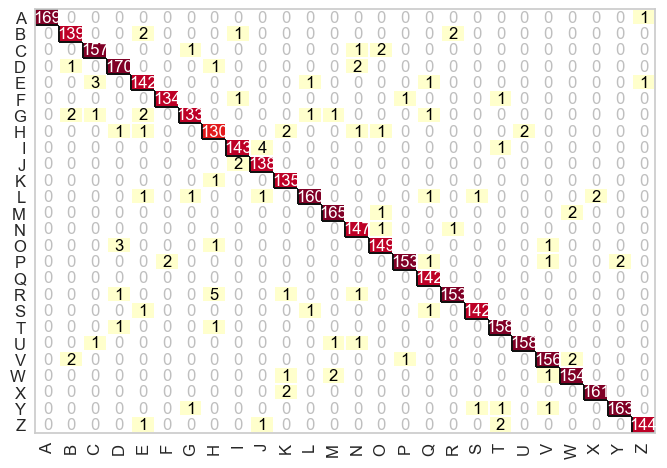

In [18]:
cm.fit(X_train, Y_train.values.ravel())
cm.score(X_validation, Y_validation)


In [19]:
# Predictions
predictions = cm.predict(X_validation)

In [20]:
# Accuracy
accuracy = accuracy_score(Y_validation, predictions)
print("Accuracy: ", accuracy)

Accuracy:  0.97375


In [24]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np


In [25]:

# Calculate confusion matrix
cm = metrics.confusion_matrix(Y_validation, predictions)

In [26]:
# Define function to plot confusion matrix
def plot_confusion_matrix(cm, class_names):
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names, yticklabels=class_names,
           title="Confusion Matrix",
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

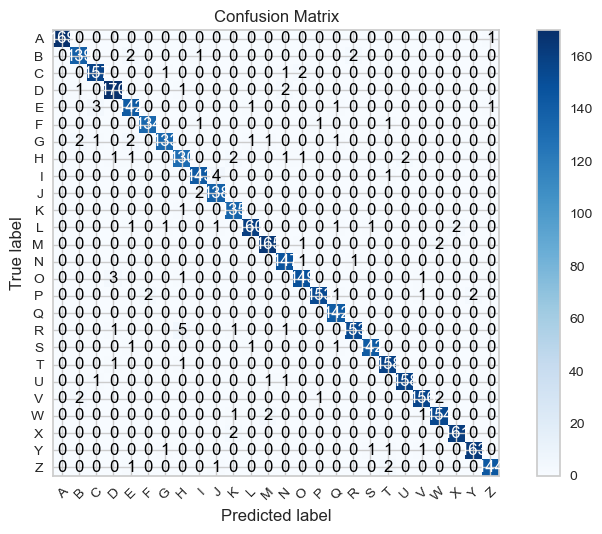

In [27]:
# Plot confusion matrix
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
               'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
               'U', 'V', 'W', 'X', 'Y', 'Z']
plot_confusion_matrix(cm, class_names)
plt.show()